In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split#splitting data arr into two subsets
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [2]:
stroke=pd.read_csv('stroke prediction.csv')
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke.shape

(5110, 11)

In [4]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#checking the null values
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
stroke[stroke==0].count()

gender                  0
age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4861
dtype: int64

C:\Users\Rajesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

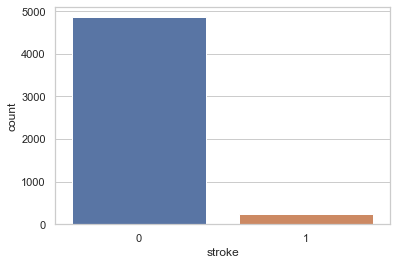

In [7]:
sns.countplot(stroke['stroke'])

In [8]:
#filling null values with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace= True)

In [9]:
#filling null values with mode
stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0], inplace=True)

In [10]:
#checking the data
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

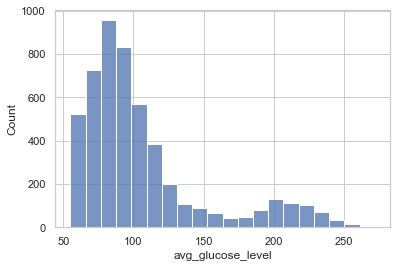

In [17]:
sns.histplot(stroke['avg_glucose_level'], bins=20)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

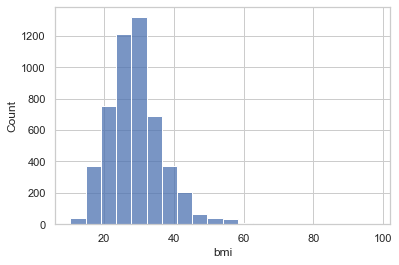

In [16]:
sns.histplot(stroke['bmi'], bins=20)

<AxesSubplot:xlabel='age', ylabel='Count'>

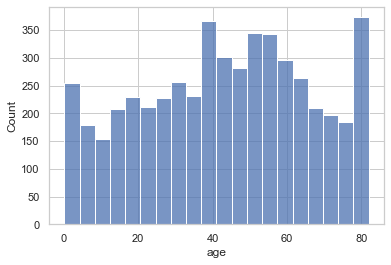

In [18]:
sns.histplot(stroke['age'], bins=20)

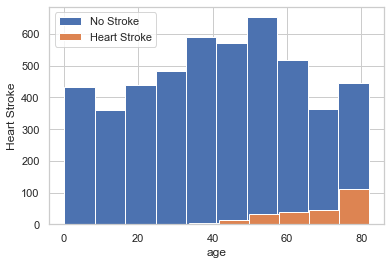

In [19]:
#does age has impact on strokes  SO ans->yes
#chances of stroke increases with increases in age
stroke.loc[stroke['stroke'] == 0,'age'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'age'].hist(label='Heart Stroke')
plt.xlabel('age')
plt.ylabel('Heart Stroke')
plt.legend()

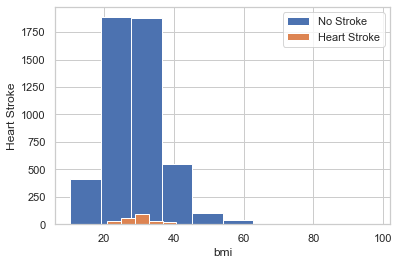

In [20]:
#chances of stroke more with bmi 20-40
stroke.loc[stroke['stroke'] == 0,'bmi'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'bmi'].hist(label='Heart Stroke')
plt.xlabel('bmi')
plt.ylabel('Heart Stroke')
plt.legend()

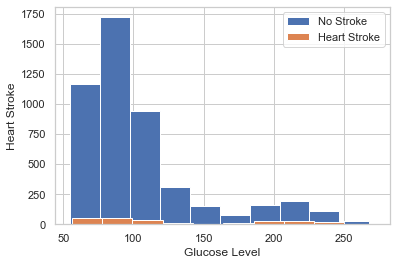

In [21]:
#chances of stroke high with glucose levels in range of 70-100
stroke.loc[stroke['stroke'] == 0,'avg_glucose_level'].hist(label='No Stroke')
stroke.loc[stroke['stroke'] == 1,'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Heart Stroke')
plt.legend()

In [22]:
#married females have more chances of heart stroke than married males
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='ever_married', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [23]:
#females with hypertension has more chance of heart stroke than males having hypertension problem
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='hypertension', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [24]:
#females with heart disease has more chances of stroke
pd.pivot_table(stroke, index= 'stroke', columns='gender', values='heart_disease', aggfunc= 'count')

gender,Female,Male,Other
stroke,,,
0,2853.0,2007.0,1.0
1,141.0,108.0,NaN


In [25]:
#people having private jobs and has a habit of smoking has more chance of heart stroke 
pd.pivot_table(stroke, index= 'stroke', columns='work_type', values='smoking_status', aggfunc= 'count')

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624.0,22.0,2776.0,754.0,685.0
1,33.0,NaN,149.0,65.0,2.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

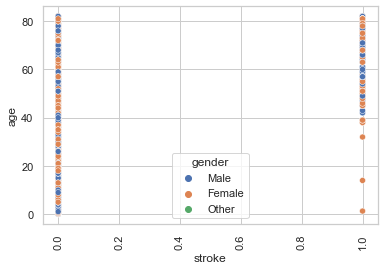

In [26]:
#as age incraeses gender does not play any role in heart stroke
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

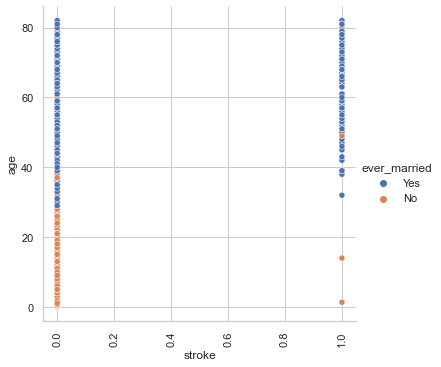

In [27]:
#can't say that marriage plays a role in heart stroke as people generally marry after the age of 25years
sns.relplot(x= 'stroke', y='age', hue= 'ever_married', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

<Figure size 2016x1440 with 0 Axes>

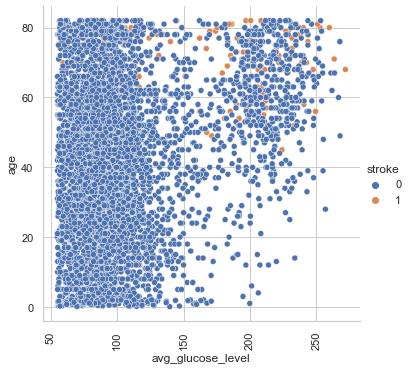

In [28]:
#with age glucose level increases which increases the chances of stroke
plt.figure(figsize=(28,20))
sns.relplot(x= 'avg_glucose_level', y='age', hue= 'stroke', sizes= (15,200), data=stroke)
plt.xticks(rotation=90)

In [29]:
stroke['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [31]:
#ENCODING THE DATASETS
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()
for i in stroke.columns:
    if isinstance(stroke[i][0], str):
        stroke[i] = encoder.fit_transform(stroke[i])

In [32]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [33]:
#STANDARDIZING
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(stroke)

In [36]:
# Separate features and target first
X = stroke.drop('stroke', axis=1)   # Features
y = stroke['stroke']                # Target

# Scale only features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   


import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.shape)


(5110, 10)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3, random_state = 100)

In [41]:
log = LogisticRegression()

In [42]:
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
print(log.score(X_train, y_train)*100)

94.96785015376014


In [ ]:
#this model shows that it is overfit which is considering the high data so that we have to balance the data by some models(i.e) logistic regression

In [45]:
#to retain the original data, we craeted a copy of the dataset
stroke_copy = stroke.copy()

In [46]:
stroke_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [47]:
#creating a list of data values which is more in number to make a balance data
li = list(stroke_copy[stroke_copy.stroke == 0].sample(n=2000).index)
stroke_copy['stroke'].value_counts() 


stroke
0    4861
1     249
Name: count, dtype: int64

In [48]:
stroke = pd.DataFrame(stroke)
# stroke.reset_index()

In [51]:
X_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.001234e+00,-0.351781
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,4.615554e-16,0.581552
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,4.685773e-01,0.581552
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,7.154182e-01,1.514885
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-6.357112e-01,0.581552
...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,1.626390,3.043196,-0.238947,0.723884,-0.153836,0.984080,-0.494658,4.615554e-16,0.581552
5106,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,0.984080,0.420775,1.442949e+00,0.581552
5107,-0.840344,-0.363842,-0.328602,-0.238947,0.723884,0.763438,-1.016178,-0.511443,2.217363e-01,0.581552
5108,1.188073,0.343796,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,1.328257,-4.278451e-01,-0.351781


In [52]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [53]:
model = LogisticRegression(class_weight='balanced')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state=1000)


In [55]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [56]:
#the accuracy has dropped
model.score(X_test, y_test)

0.7123287671232876

In [59]:
#predicting the output with Logistic
y_underlog = model.predict(X_scaled)

In [60]:
print('The accuracy score of the model is:', accuracy_score(y,y_underlog)*100)
print('The F1 score of the model is:', f1_score(y, y_underlog)*100)
print('The recall score of the model is:', recall_score(y, y_underlog)*100)
print('The confusion matrix of the model is:', confusion_matrix(y, y_underlog))
print('The classification report of logistic model is: \n', classification_report(y, y_underlog))

The accuracy score of the model is: 72.89628180039139
The F1 score of the model is: 22.495803021824283
The recall score of the model is: 80.72289156626506
The confusion matrix of the model is: [[3524 1337]
 [  48  201]]
The classification report of logistic model is: 
               precision    recall  f1-score   support

           0       0.99      0.72      0.84      4861
           1       0.13      0.81      0.22       249

    accuracy                           0.73      5110
   macro avg       0.56      0.77      0.53      5110
weighted avg       0.94      0.73      0.81      5110



In [61]:
cm_log= confusion_matrix(y, y_underlog)

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

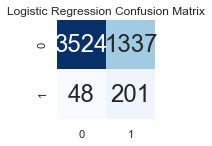

In [62]:
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
#
# THIRD METHOD: OVERSAMPLING (to make the stroke/not-stroke balanced)
#

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [68]:
X_res.shape

(9722, 10)

In [66]:
y_res.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [70]:
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_res)   

X_scaled_new = pd.DataFrame(X_scaled_new, columns=X.columns)

print(X_scaled_new.shape)

(9722, 10)


In [72]:
new_model = LogisticRegression(class_weight = "balanced")

In [73]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new,y_res,test_size = 0.3,random_state=1000)

In [74]:
new_model.fit(X_train_new,y_train_new)

LogisticRegression(class_weight='balanced')

In [75]:
# calc accuracy
new_model.score(X_test_new, y_test_new)

0.8217346588961262

In [76]:
#predicting the output with Logistic
y_pred = model.predict(X_scaled_new)

In [77]:
print('The accuracy score of the model is:', accuracy_score(y_res, y_pred)*100)
print('The F1 score of the model is:', f1_score(y_res, y_pred)*100)
print('The recall score of the model is:', recall_score(y_res, y_pred)*100)
print('The confusion matrix of the model is:', confusion_matrix(y_res, y_pred))
print('The classification report of logistic model is: \n', classification_report(y_res, y_pred))

The accuracy score of the model is: 71.26105739559762
The F1 score of the model is: 66.36976408281174
The recall score of the model is: 56.716724953713225
The confusion matrix of the model is: [[4171  690]
 [2104 2757]]
The classification report of logistic model is: 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      4861
           1       0.80      0.57      0.66      4861

    accuracy                           0.71      9722
   macro avg       0.73      0.71      0.71      9722
weighted avg       0.73      0.71      0.71      9722



In [80]:
conf_matrix =  confusion_matrix(y_res, y_pred)

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

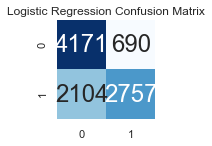

In [81]:
# Now precision is improved

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

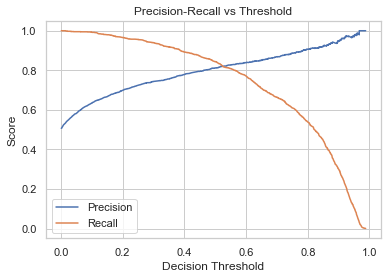

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. Fit the model on training data
new_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
new_model.fit(X_train_new, y_train_new)

# 2. Predict probabilities on the test set
y_probs = new_model.predict_proba(X_test_new)[:, 1]

# 3. Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_new, y_probs)

# 4. Plot Precision vs Recall as function of threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()


In [125]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

# Predict probabilities
y_probs = new_model.predict_proba(X_test_new)[:, 1]

# Apply your custom threshold
threshold = 0.49

y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(y_test_new, y_pred_custom)*100)
print("F1 Score:", f1_score(y_test_new, y_pred_custom))
print("Recall:", recall_score(y_test_new, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test_new, y_pred_custom))
print("Classification Report:\n", classification_report(y_test_new, y_pred_custom))


Accuracy: 82.3791566678094
F1 Score: 0.8304749340369394
Recall: 0.8512508451656524
Confusion Matrix:
 [[1144  294]
 [ 220 1259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1438
           1       0.81      0.85      0.83      1479

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



AUC Score: 0.8995200305435107


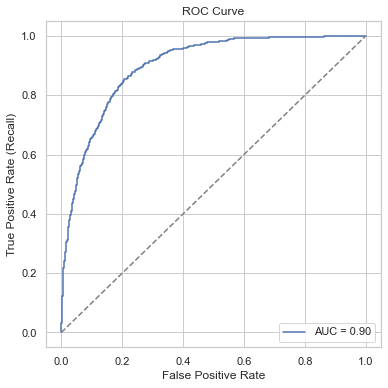

In [129]:
# AUC = Area Under the ROC Curve

# Measures the model’s ability to distinguish between the two classes (stroke vs no stroke).

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = new_model.predict_proba(X_test_new)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_new, y_probs)

# Compute AUC
auc_score = roc_auc_score(y_test_new, y_probs)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [130]:
import pickle
pickle.dump(new_model, open("strokenew.pkl", "wb"))